### Context

Sebuah perusahaan X di Amerika Serikat memiliki bisnis di bidang E-Commerce dimana pembeli dan penjual bisa bertransaksi (melakukan penjualan/pembelian) melalui website tersebut. Transaksi pembelian dari website E-Commerce bisa datang dari berbagai kategori barang/jasa. Perusahaan X mendapatkan keuntungan dari tiap transaksi yang dilakukan oleh customer, sehingga adanya pertumbuhan customer dibutuhkan agar perusahaan bisa mendapatkan lebih banyak keuntungan. Di beberapa tahun terakhir perusahaan mengalami pertumbuhan customer yang cukup baik, namun dari data terbaru mulai menunjukkan bahwa adanya peningkatan customer yang churn dari keseluruhan customer di website E-Commerce tersebut. 

Sebagai konteks, ada dua cara agar perusahaan dapat mempertahankan pertumbuhan keuntungan. Pertama yaitu mempertahankan customer lama agar menetap sebagai customer. Cara kedua yaitu mencari customer baru. Berdasarkan statistik dari berbagai industri bisnis, hasil riset menemukan bahwa customer acquisition memiliki biaya 4-5x lipat lebih dari customer retention

Pada kesimpulannya, mendapatkan customer baru memakan biaya yang lebih banyak dibandingkan dengan mempertahankan customer lama untuk tidak churn sehingga kita harus lebih fokus ke customer retention. Sehingga, perusahaan harus memikirkan cara untuk memprediksi customer yang berpotensi untuk churn dan memberikan treatment yang diperlukan agar customer menetap di platform E-Commerce perusahaan.



### Problem Statement

Salah satu tantangan yang dihadapi oleh bisnis E-Commerce adalah untuk membuat customer agar menetap dan tetap melakukan transaksi. **Perusahaan mengalami penurunan pertumbuhan customer akibat customer churn yang mengakibatkan keuntungan perusahaan berkurang**.

### Goals

Berdasarkan masalah yang dihadapi, perusahaan harus bisa **memprediksi customer mana saja yang berpotensi untuk churn, lalu memberikan treatment yang tepat untuk customer tersebut agar tidak churn**. Sehingga perusahaan bisa **mempertahankan keuntungan** yang telah didapatkan. Juga, **meminimalisir retention cost yang diperlukan** untuk customer yang mau melakukan churn.

### Analytic Approach

akan dilakukan analisis data untuk menemukan pola yang membedakan customer yang akan churn atau yang tidak churn. Kemudian akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi customer akan churn atau tidak.


# IMPORTING LIBRARIES

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Statistical Test
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Modeling
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, fbeta_score

# Deployment
import pickle

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

Note:

Feature dalam dataset terbagi menjadi data numerical (integer/float) dan categorical.
Setiap baris data merepresentasikan data customer dan transaksinya dalam sebuah platform e-commerce.

# LOAD DATASET 

In [2]:
# Read the CSV file into a DataFrame
data = pd.read_csv(r"C:\Users\DAFFA K R\Downloads\data_ecommerce_customer_churn.csv")
data


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [3]:
# Print the first few rows
print(data.head())

   Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0             29.0                         4  Laptop & Accessory   
1     7.0             25.0                         4              Mobile   
2    27.0             13.0                         3  Laptop & Accessory   
3    20.0             25.0                         4             Fashion   
4    30.0             15.0                         4              Others   

   SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                  3        Single                2         0   
1                  1       Married                2         0   
2                  1       Married                5         0   
3                  3      Divorced                7         0   
4                  4        Single                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0          143.32      0  
1                7.0          129.29      0  
2             

# DATA INFORMATION

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [5]:
# Cek duplikat pada 'NumberOfDeviceRegistered'
print('Apakah terdapat data duplikat pada kolom "NumberOfDeviceRegistered"?','Ada' if data['NumberOfDeviceRegistered'].duplicated().any() == True else 'Tidak ada')
print(f'Jumlah data duplikat: {data.duplicated().sum()}')

Apakah terdapat data duplikat pada kolom "NumberOfDeviceRegistered"? Ada
Jumlah data duplikat: 671


Seperti terlihat pada tabel 'df' diatas, diketahui bahwa variabel NumberOfDeviceRegistered adalah berisi nomor device yang sudah teregistrasi dan dapat dilihat  ada 671 dupikat didalam nya, jika variabel tersebut tidak mempunyai duplikat didalam nya (asumsinya tidak ada pengulangan data dalam dataset). Kemudian variabel NumberOfDeviceRegisteredD juga akan didrop karena tidak memiliki relevansi khusus terhadap EDA dan model machine learning.

In [6]:
# Membuat copy untuk dataset
df = data.copy()

In [7]:
# Cek jumlah baris dan kolom dataset
print(f'Jumlah baris dataset: {df.shape[0]}\nJumlah kolom dataset: {df.shape[1]}')

Jumlah baris dataset: 3941
Jumlah kolom dataset: 11


In [8]:
# Menampilkan statistik deskriptif dari numerical variable
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [9]:
# Menampilkan statistik deskriptif dari categorical variable
df.describe(include='O')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [10]:
# Memeriksa missing value dan unique value pada dataset
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].isna().sum(),
        round((df[i].isna().sum())/(df[i].isna().count())*100,2),
        df[i].nunique(),
        df[i].sample(3).values
    ])

pd.DataFrame(data=dataDesc,columns=['Column','Null','% Null','No. Unique Values', 'Sample of Unique Values'])

,Column,Null,% Null,No. Unique Values,Sample of Unique Values
0,Tenure,194,4.92,36,"[16.0, 8.0, 7.0]"
1,WarehouseToHome,169,4.29,33,"[10.0, 17.0, nan]"
2,NumberOfDeviceRegistered,0,0.00,6,"[3, 5, 4]"
3,PreferedOrderCat,0,0.00,6,"[Mobile Phone, Mobile Phone, Mobile Phone]"
4,SatisfactionScore,0,0.00,5,"[3, 3, 4]"
5,MaritalStatus,0,0.00,3,"[Divorced, Married, Married]"
6,NumberOfAddress,0,0.00,14,"[8, 1, 6]"
7,Complain,0,0.00,2,"[0, 0, 1]"
8,DaySinceLastOrder,213,5.40,22,"[4.0, 3.0, 13.0]"
9,CashbackAmount,0,0.00,2335,"[151.78, 185.77, 146.15]"


Pada dataset ini, terdapat beberapa variabel yang memiliki missing value. Untuk lebih mengetahui mengenai distribusi data yang memiliki missing value, maka digunakan library missingno untuk memvisualisasikannya.

# BarPlot

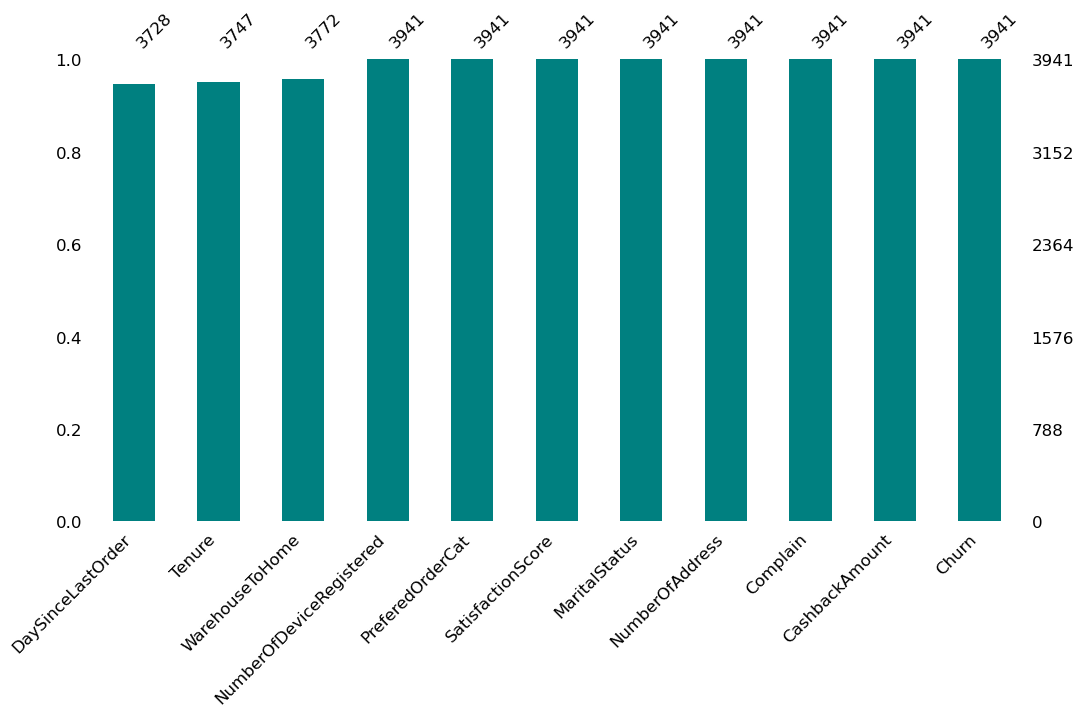

In [11]:
msno.bar(df, sort="ascending", figsize=(12,6), fontsize=12, color='teal');

Pada bar plot diatas menunjukkan bahwa variabel DaySinceLastOrder,Tenure,WarehouseToHome adalah variabel-variabel yang memiliki missing values. Dari bar plot pun dapat diketahui bahwa jumlah data yang hilang tidak begitu banyak (dalam rentang 250an data).

# Matrix Plot

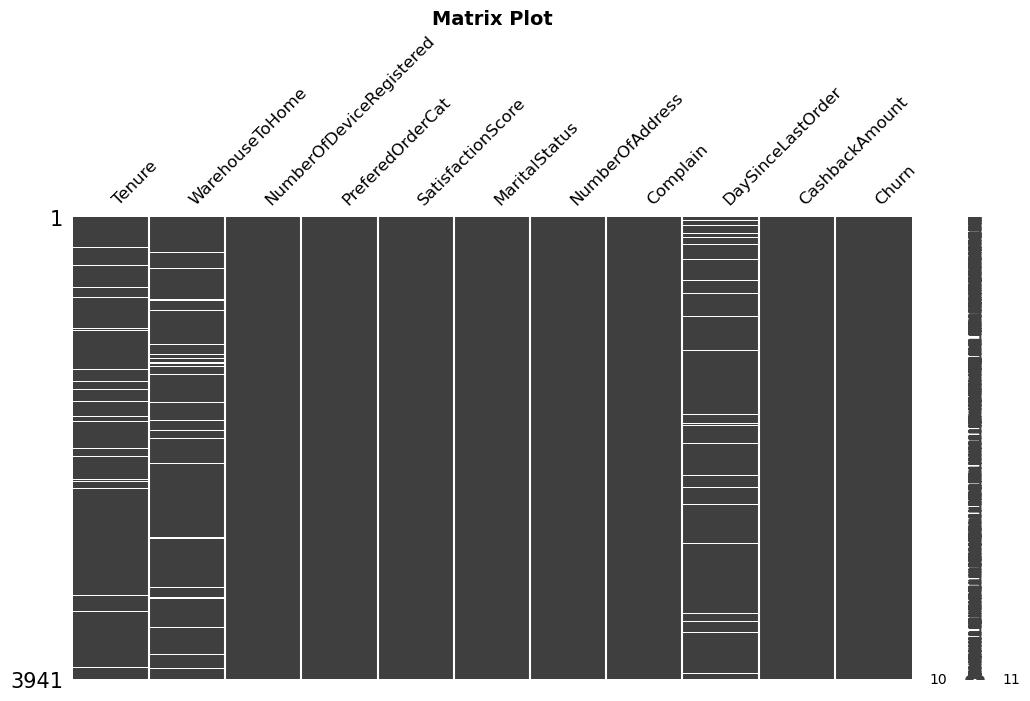

In [12]:
msno.matrix(df, figsize=(12,6), fontsize=12).set_title('Matrix Plot', size=14, weight='bold');

Matrix plot akan memberikan isian warna untuk setiap kolomnya. Apabila data ada, maka plot diarsir dalam warna abu-abu. Jika tidak ada data (missing values), maka plot ditampilkan dalam warna putih. Jika dilihat pada matrix plot diatas, terlihat bahwa pada variabel dengan missing values memiliki pola yang acak (tidak menunjukkan pola yang sama antar feature).

In [13]:
#feature selection
import sklearn
from sklearn.feature_selection import SelectKBest, chi2
X= df[["Tenure","WarehouseToHome","DaySinceLastOrder",'NumberOfDeviceRegistered','PreferedOrderCat','SatisfactionScore','MaritalStatus','NumberOfAddress','Complain','CashbackAmount']]
y = df[["Churn"]]
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


# HEATMAP

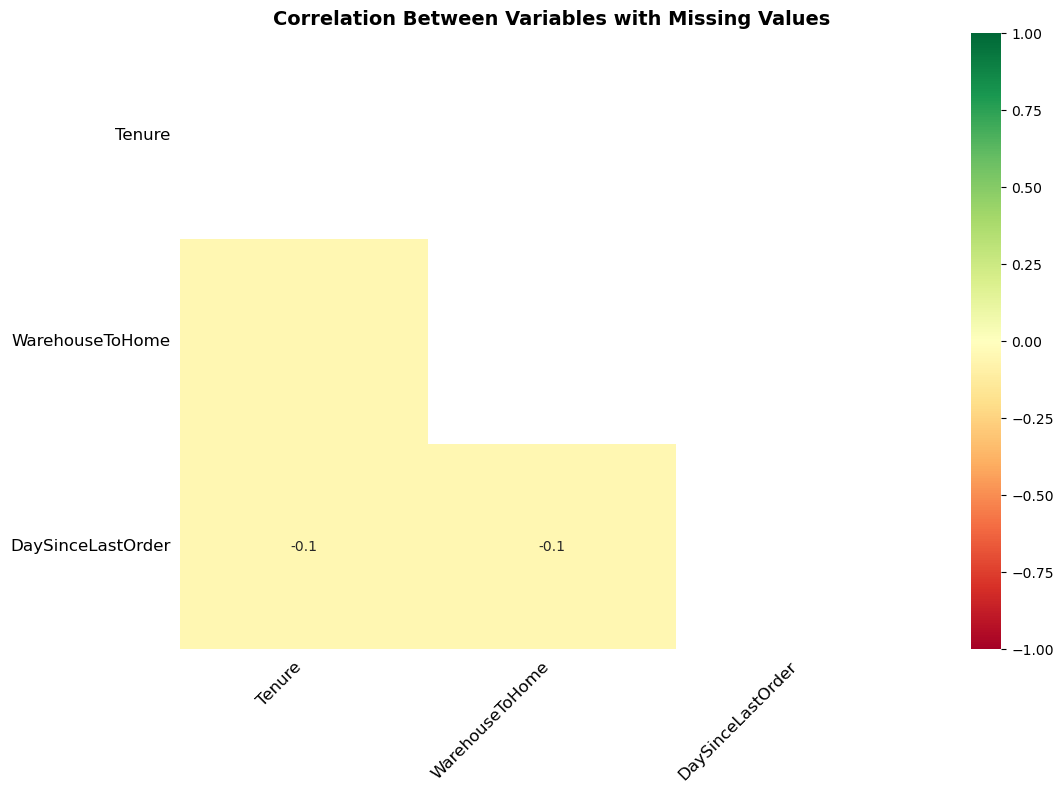

In [14]:
msno.heatmap(df, cmap="RdYlGn", figsize=(12,8), fontsize=12).set_title('Correlation Between Variables with Missing Values', size=14, weight='bold');

Pada heatmap diatas menunjukkan bahwa semua variabel yang memiliki missing values memiliki hubungan korelasi negatif yang sangat lemah (-0.1) atau tidak ada hubungan antara missing value dalam satu kolom dibandingkan dengan yang lain. Artinya apabila terdapat missing value pada satu variabel, maka tidak ditemukannya missing value pada variabel lainnya.

DUPLICATED DATA

In [15]:
print('Apakah terdapat data duplikat? :','Ada' if df.duplicated().any() == True else 'Tidak ada')
print(f'Jumlah data duplikat: {df.duplicated().sum()}')

Apakah terdapat data duplikat? : Ada
Jumlah data duplikat: 671


Ternyata, ditemukan 671 data duplikat dalam dataset. Oleh karena itu, data duplikat akan di drop pada tahap data preprocessing.

,n_churned,count
0,0,3267
1,1,674


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

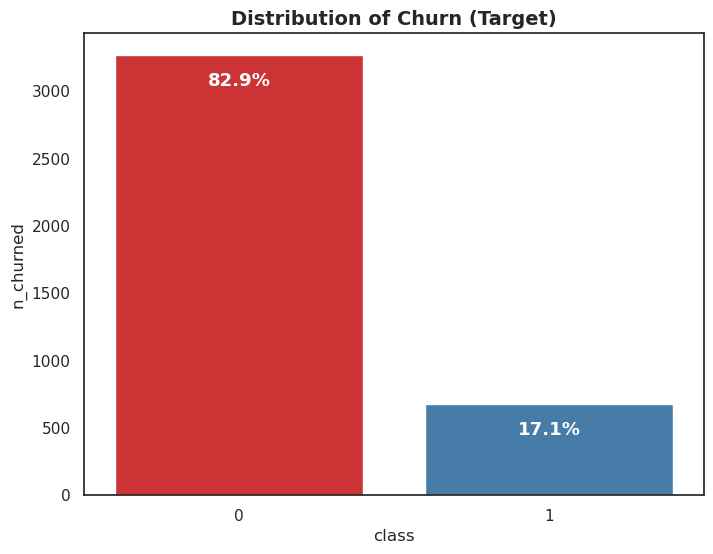

In [16]:
# Set theme dan palette untuk visualisasi
sns.set_theme(style='white', palette='Set1', font='Roboto')

plt.figure(figsize=(8,6))
total = len(df)
ax = sns.countplot(data=df, x='Churn')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x()+0.4, p.get_height()-125), ha='center', va='top', color='white', size=13, weight='bold')
plt.title('Distribution of Churn (Target)', size=14, weight='bold')
ax.set_xlabel('class')
ax.set_ylabel('n_churned')

n_churned = pd.DataFrame(df['Churn'].value_counts()).reset_index().rename(columns={'index':'class', 'Churn':'n_churned'})
n_churned

Dalam dataset ini, dapat diketahui bahwa 17.1% customer yang meninggalkan layanan ecommerce ini. Angka tersebut juga menunjukkan bahwa variable Churn yang sebagai target dalam modeling memiliki data yang moderate imbalance. Data yang imbalance ini perlu ditreatment agar saat dilakukan modeling, algoritmanya tidak belajar lebih banyak hanya pada data kelas negatif saja (class 0).

Categorical Feature vs Target

Untuk melihat menguji keterkaitan antara feature categorical dengan target, disini akan menggunakan uji chi-square. 

In [17]:
# Melakukan uji chi square
cat_cols = list(df.describe(include='O').columns)
chi2_result = []

for i in cat_cols:
  df_chi = pd.crosstab(df[i], df['Churn'])
  stat, pvalue, dof, expected = chi2_contingency(df_chi)
  chi2_result.append(round(pvalue, 5))

df_chi_result = pd.DataFrame({'categorical_features': cat_cols,'chi2_score': chi2_result})
df_chi_result['notes'] = np.where(df_chi_result['chi2_score'] > 0.05, 'independent', 'dependent')
df_chi_result

,categorical_features,chi2_score,notes
0,PreferedOrderCat,0.0,dependent
1,MaritalStatus,0.0,dependent


# Data Analysis
Setelah dibuatkannya visualisasi atas distribusi data dan korelasi data antar variabel, selanjutnya akan dilakukan data analisis. Sebelum dilakukan analisis, kami memiliki asumsi-asumsi terkait analisis customer churn ini. Adapun asumsi kami akan dituangkan dalam beberapa pertanyaan sebagai berikut:

Apakah customer yang berhenti menggunakan langganan ecommerce berhenti di awal bulan penggunaan layanan?

Apakah customer yang mengajukan complain cenderung berhenti menggunakan layanan ecommerce?

Apakah angka kepuasan yang rendah akan menunjukkan tingkat churn yang tinggi?

## Apakah customer yang berhenti menggunakan langganan ecommerce berhenti di awal bulan penggunaan layanan?

Churn,0,1,Total,Churn %
Tenure,,,,
0.0,152.0,195.0,347.0,56.2
1.0,237.0,252.0,489.0,51.5
2.0,107.0,10.0,117.0,8.5
3.0,123.0,13.0,136.0,9.6
4.0,138.0,13.0,151.0,8.6


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

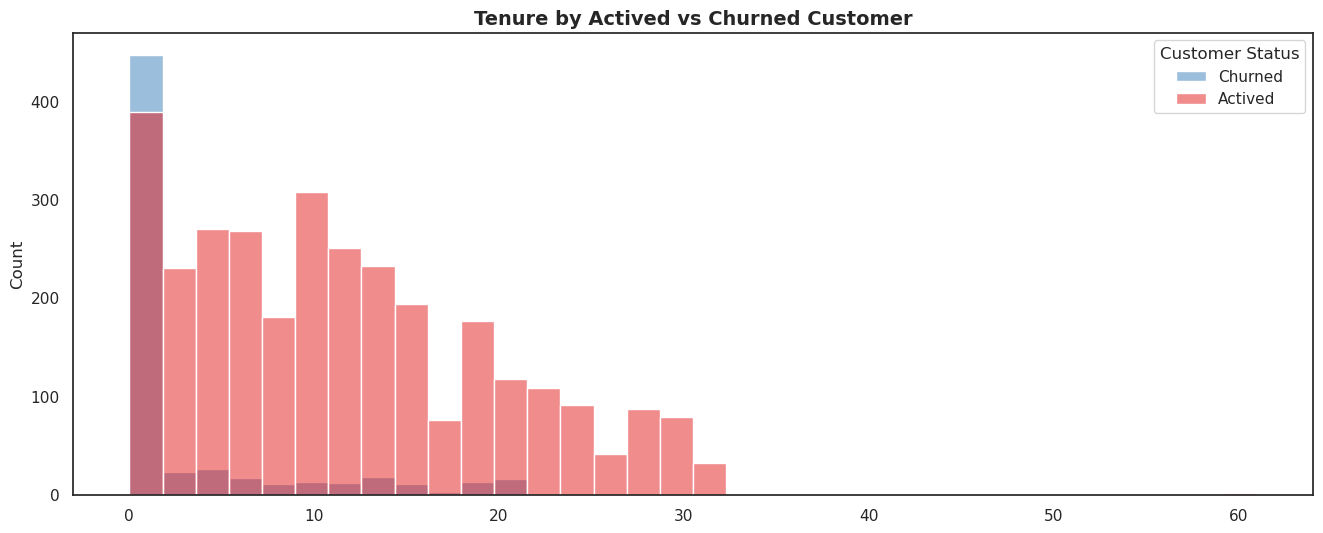

In [18]:
# Function untuk crosstab table
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab

plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x='Tenure', hue='Churn')
ax.set_title('Tenure by Actived vs Churned Customer', size=14, weight='bold')
ax.set_xlabel(None)
plt.legend(title='Customer Status', labels=['Churned', 'Actived'])

crosstab_viz('Churn', 'Tenure').T.head(5)

Karena Tenure berkorelasi negatif terkuat dengan Churn, maka dengan visualisasi histogram diatas dapat diketahui bahwa angka penggunaan layanan ecommerce meningkat di bawah 2 bulan. Hal ini dapat diasumsikan karena customer tertarik di awal dengan layanan yang disuguhkan ecommerce tersebut. Namun jika dilihat berdasarkan Churn, ternyata asumsi di awal benar dimana angka customer yang berhenti menggunakan layanan ecommerce di bawah 2 bulan lebih tinggi daripada periode lainnya. pada periode awal penggunaan suatu layanan, customer kerap berhenti dari layanan tersebut karena berbagai hal, seperti:

Support customer yang tidak memuaskan (kadang hingga tidak menyelesaikan permasalahan),
Ketersediaan produk dalam ecommerce,
Kualitas layanan ecommerce (misal proses pembayaran, proses pengiriman), dan lainnya.

 ## Apakah customer yang mengajukan complain cenderung berhenti menggunakan layanan ecommerce?

Complain,0,1
Churn,,
0,2519.0,748.0
1,309.0,365.0
Total,2828.0,1113.0
Churn %,10.9,32.8


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

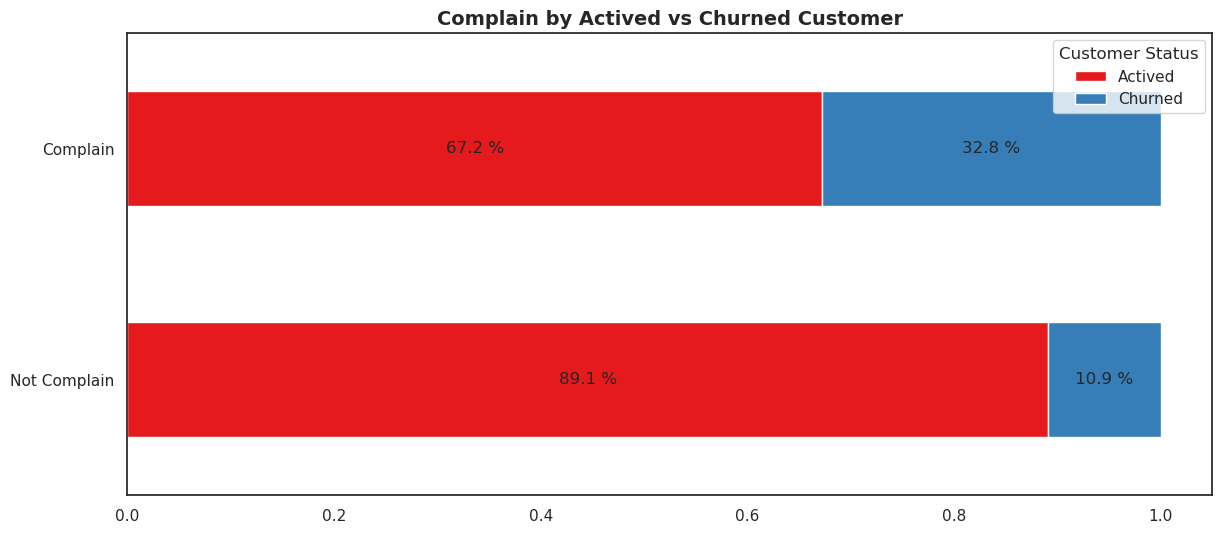

In [19]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
complain_churn = df.groupby('Complain')['Churn'].value_counts(normalize=True).unstack('Churn')
complain_churn.plot.barh(stacked=True, ax = ax)
plt.title('Complain by Actived vs Churned Customer', size=14, weight='bold')
plt.yticks(ticks=[0, 1], labels=['Not Complain', 'Complain'], rotation=0)
plt.ylabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')

for ix, row in complain_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix, 
                    f"{int(round(element,3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'Complain')

Kemudian untuk feature `Complain` yang berkorelasi positif terkuat dengan `Churn` menunjukkan bahwa berdasarkan pengajuan complain dari customer, proporsi customer yang mengajukan complain lebih tinggi untuk berhenti menggunakan layanan ecommerce sebesar 32.8%. Hal ini sejalan dengan asumsi diawal dimana customer yang complain cenderung lebih tinggi untuk churn dari ecommerce. diketahui bahwa customer yang mengajukan complain adalah customer yang kerap mengalami ketidakpuasan dalam layanan yang diberikan sehingga sangat dimungkinkan customer menjadi beralih ke kompetitor. Oleh karena itu, maka perusahaan perlu untuk mereview kembali prosedur customer support yang telah dimiliki saat ini dan meningkatkan layanan customer support yang lebih baik sehingga meminimalisir terjadinya churn

## Apakah angka kepuasan yang rendah akan menunjukkan tingkat churn yang tinggi?

SatisfactionScore,1,2,3,4,5
Churn,,,,,
0,712.0,341.0,979.0,637.0,598.0
1,93.0,51.0,211.0,121.0,198.0
Total,805.0,392.0,1190.0,758.0,796.0
Churn %,11.6,13.0,17.7,16.0,24.9


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

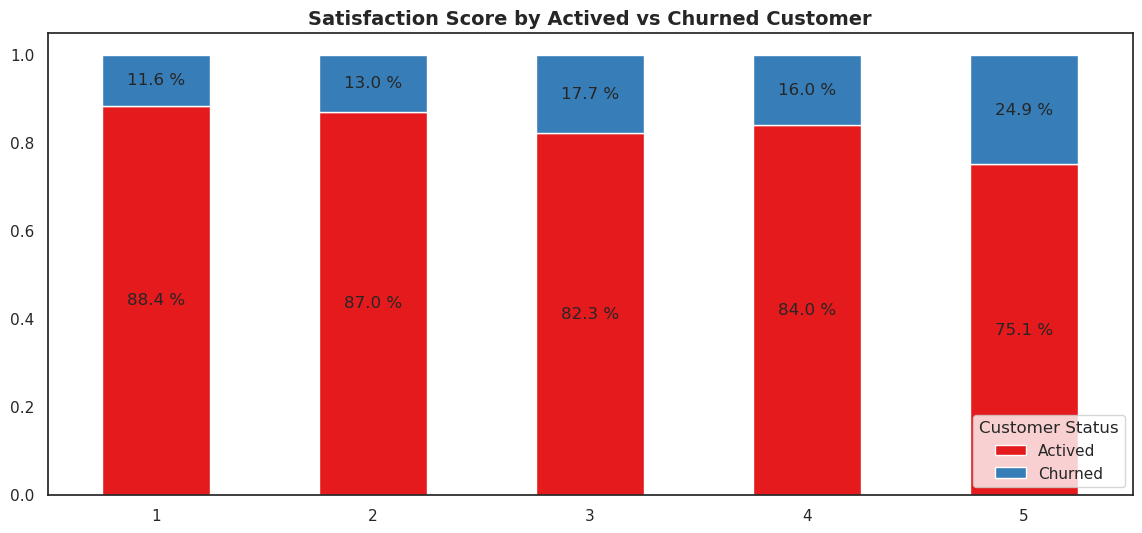

In [20]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
satisfaction_churn = df.groupby('SatisfactionScore')['Churn'].value_counts(normalize=True).unstack('Churn')
satisfaction_churn.plot.bar(stacked=True, ax= ax)
plt.title('Satisfaction Score by Actived vs Churned Customer', size=14, weight='bold')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='lower right')

for ix, row in satisfaction_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{int(round(element, 3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'SatisfactionScore')

Dapat diketahui bahwa ternyata customer yang memberikan score 5 justru yang paling banyak berhenti dari layanan ecommerce. Sebaliknya, customer yang memberikan score 1 lebih sedikit yang churn. Hal ini membantah asumsi dimana diperkirakan customer yang memberikan score 1 akan menunjukkan tingkat churn yang tinggi daripada customer yang memberikan score diatas 1. Namun hal ini serupa dengan case di dunia nyata dimana customer yang memberikan score kepuasan 1 mungkin saja tetap menggunakan ecommerce dan yang memberikan score kepuasan 5 justru mungkin saja keluar dari layanan ecommerce. Tetapi, untuk menghindari adanya customer yang memberikan nilai kepuasan yang tinggi namun berujung dengan meninggalkan aplikasi e-commerce ini, maka perusahaan dapat menggali lebih dalam tentang penilaian user terkait aplikasi (customer review).

### Delete Duplicated Values

Pada dataset ini, diketahui bahwa terdapat 671 data customer yang duplikat. Drop duplikat data perlu dilakukan agar saat modeling, algoritmanya belajar dari data yang spesifik saja. Apabila data duplikat dibiarkan, maka algoritma model akan terlalu mempelajari data yang duplikat tersebut dan menghasilkan prediksi data yang kurang baik (bias). Oleh karena itu, selanjutnya akan didrop 671 data duplikat tersebut.

In [21]:
# Drop data duplicates
df = df.drop_duplicates()

# Menampilkan jumlah baris dan kolom setelah drop duplicates
print(f'Jumlah baris dataset: {df.shape[0]}\nJumlah kolom dataset: {df.shape[1]}')

Jumlah baris dataset: 3270
Jumlah kolom dataset: 11


### Drop Outliers
Drop outlier dilakukan agar mendapatkan hasil modeling yang terbaik. Drop outlier dapat dilakukan sebanyak 1-3 kali yang nanti pada akhirnya dipilih pemberlakuan drop outlier yang paling tepat untuk tingkat akurasi model yang paling tinggi. Untuk modeling ini, di bagian ini dilakukan drop outlier sebanyak 1 kali agak tidak banyak data yang terhapus.

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

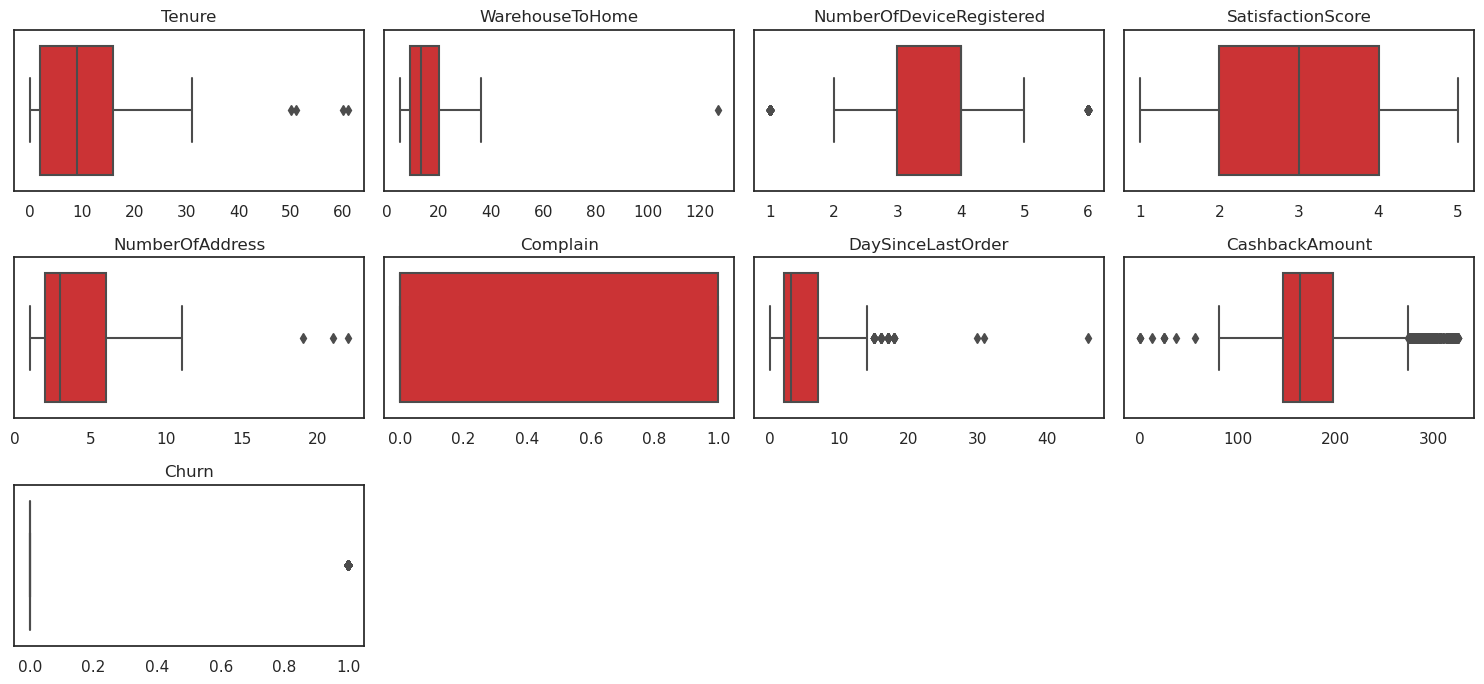

In [22]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,4, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.xlabel(None)
    plt.tight_layout()
    plotnumber += 1

In [23]:
# Menampilkan dataframe setelah drop outlier
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [49]:
df.dropna()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,5,0,7.0,168.54,0
4,30.0,15.0,4,Others,4,8,0,8.0,322.17,0
5,7.0,16.0,4,Mobile Phone,2,2,0,11.0,152.81,0
...,...,...,...,...,...,...,...,...,...,...
3935,26.0,7.0,4,Grocery,1,4,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,3,1,2.0,156.60,0


In [25]:
# Menampilkan value counts dari 'Churn' setelah drop outlier
df['Churn'].value_counts()

Churn
0    3267
1     674
Name: count, dtype: int64

In [26]:
knn = KNeighborsClassifier()

## Data Preprocessing

Data akan di-encoding untuk fitur-fitur kategorikal & di impute/drop untuk fitur-fitur yang memiliki missing value. Skenario preprocessing yang terbaik akan untuk tingkat akurasi model tertinggi yang nanti akan dipilih.

In [27]:
# Skenario 1 (Missing Value di Drop)
transformer1 = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first',handle_unknown = 'ignore'), ['PreferedOrderCat']),
], remainder='passthrough')

In [28]:
# Skenario 2 (Missing Value di Input)
transformer2 = ColumnTransformer([
    ('imp_iter', IterativeImputer(),['DaySinceLastOrder', 'Tenure','WarehouseToHome']),
    ('One Hot', OneHotEncoder(drop='first',handle_unknown = 'ignore'), ['PreferedOrderCat']),
], remainder='passthrough')

## MODELLING

In [42]:
# Define X and Y
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train Test Split dengan test size 80:20
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

testing = pd.DataFrame(transformer2.fit_transform(X_train),columns=transformer2.get_feature_names_out())
testing.head()

,imp_iter__DaySinceLastOrder,imp_iter__Tenure,imp_iter__WarehouseToHome,One Hot__PreferedOrderCat_Grocery,One Hot__PreferedOrderCat_Laptop & Accessory,One Hot__PreferedOrderCat_Mobile,One Hot__PreferedOrderCat_Mobile Phone,One Hot__PreferedOrderCat_Others,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__CashbackAmount
0,17.0,26.0,10.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,3.0,0.0,293.56
1,5.0,18.0,32.0,0.0,1.0,0.0,0.0,0.0,4.0,5.0,2.0,0.0,143.85
2,3.0,1.0,17.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,4.0,0.0,145.73
3,2.0,6.0,19.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,4.0,0.0,134.52
4,1.0,25.0,14.0,0.0,1.0,0.0,0.0,0.0,5.0,3.0,4.0,0.0,186.32


In [43]:
# Classification Models
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier

# Scalers
robust = RobustScaler()
minmax = MinMaxScaler()
standard = StandardScaler()


Predict To Test Set 

In [47]:
models = [logreg,dt,knn]
score_f2 = []

for i in models:
    estimator=Pipeline([
        ('preprocess',transformer2),
        ('scaler', robust),
        ('model',i)])
    
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    score_f2.append(fbeta_score(y_test, y_pred,beta=2))

score_before_tuning = pd.DataFrame({'Models':models,'F2_score':score_f2})
score_before_tuning

,Models,F2_score
0,LogisticRegression(random_state=0),0.449438
1,DecisionTreeClassifier(random_state=0),0.806686
2,KNeighborsClassifier(),0.428803


Ketika di predict ke test set, performa Decisiontree Classifier memiliki score yang lebih baik (0.806) daripada Logisticregresion (0.449) dan KNegihbors (0.42).


## CONCLUSION AND RECOMMENDATION

### Conclusion

Berdasarkan hasil classification report dari model yang sudah di jalankan, dapat disimpulkan bahwa bila seandainya nanti menggunakan model untuk memprediksi customer yang churn atau tidak, berdasarkan hasil F2 score oleh model DECISIONTREE mendapatkan akurasi F2 score 0.806.

Setelah dibuat model machine learning untuk memprediksi customer churn, maka selanjutnya model dapat diimplementasi dalam business process di perusahaan e-commerce dengan setiap seminggu sekali. Model akan digunakan untuk melihat customer yang akan churn sehingga perusahaan dapat melakukan action kepada customer-customer yang akan churn (misal. pemberian promo, pemberian discount, dll.)

### Recommendation
- Untuk Modeling:
  - Menambah sampel pada dataset agar model dapat memiliki banyak referensi sehingga prediksi bisa menjadi lebih tepat.
  - Mencoba algoritma machine learning lainnya dan melakukan hyperparameter tuning.
  - Menganalisa data-data yang model yang salah prediksi untuk mengetahui alasannya dan karakteristiknya bagaimana.
  
<br><br>
- Untuk Bisnis:
  - Memberikan lebih banyak promo dan support customer yang baik di awal bagi customer baru agar dapat meningkatkan lamanya periode customer menggunakan layanan ecommerce.
  - Mempertimbangkan pemberian cashback yang lebih banyak agar mengurangi jumlah customer yang churn.
  - Mereview kerjasama dengan pihak ketiga terkait support pembayaran COD guna meningkatkan experience yang lebih baik bagi customer.